<a href="https://colab.research.google.com/github/aynaval/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data = pd.read_csv('/content/drive/MyDrive/coronaa/Copy of Coronavirus Tweets.csv',encoding = "ISO-8859-1")

In [51]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [52]:
data.sample(5)

UserName  ScreenName          Location     TweetAt  \
35111     38910       83862  Philadelphia, PA  08-04-2020   
29079     32878       77830       Atlanta, GA  05-04-2020   
3861       7660       52612     United States  18-03-2020   
32196     35995       80947            Canada  07-04-2020   
6081       9880       54832  South Shropshire  19-03-2020   

                                           OriginalTweet           Sentiment  
35111  Coronavirus Latest: Retired President Of New J...             Neutral  
29079  Recession doesnÂt always equal a #housing cri...  Extremely Negative  
3861   As the novel #coronavirus pandemic spreads, ke...            Positive  
32196  @Raptors @NBATVCanada Commit to reducing your ...            Positive  
6081   Oh, God. This dear woman ...\r\r\n#panicbuying...  Extremely Positive

In [53]:
data.tail(5)

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

In [54]:
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [55]:
data['Sentiment'].nunique()

5

In [56]:
data.describe(include='all')

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                            OriginalTweet Sentiment  
count                                               41157     41157  
unique                                              41157         5  
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive  
freq                                                    1     11422  
mean                                                  NaN       NaN  
std                                                   NaN       NaN  
min                                                   NaN       NaN  
25%                                                   NaN       NaN  
50%                                                   NaN       NaN  
75%                                                   NaN       NaN  
max                                                   NaN       NaN

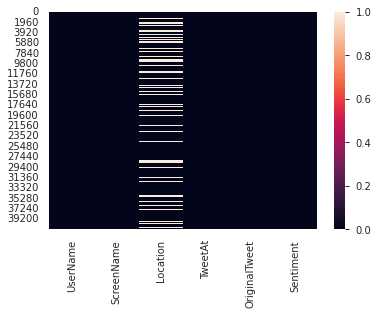

In [57]:
sns.heatmap(data.isnull());

In [58]:
pd.concat([data.isnull().sum(),round((data.isnull().sum()/len(data.index))*100,2)],axis=1,keys=['Missing values','Percent'])

Missing values  Percent
UserName                    0     0.00
ScreenName                  0     0.00
Location                 8590    20.87
TweetAt                     0     0.00
OriginalTweet               0     0.00
Sentiment                   0     0.00

In [59]:
data.duplicated().value_counts()

False    41157
dtype: int64

In [60]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='corona.html')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [62]:
data.shape

(41157, 6)

In [63]:
data.size

246942

In [64]:
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

## **EDA**

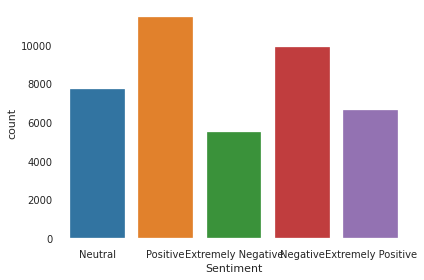

In [65]:
sns.countplot(x=data['Sentiment'])
plt.tight_layout();

* Postive is the most common emotion while extremly negative is the least common emotion.

In [66]:
data['Location'].value_counts()[(data['Location'].value_counts()<10)]

Riverside, CA                                                                                                                                         9
Columbia, SC                                                                                                                                          9
Washington                                                                                                                                            9
Vienna, Austria                                                                                                                                       9
Buffalo, NY                                                                                                                                           9
USA                                                                                                                                                   9
New Mexico, USA                                                                         

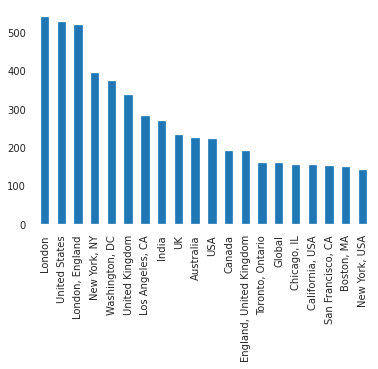

In [67]:
data['Location'].value_counts()[0:20].plot(kind='bar')

In [68]:
data['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
7        Was at the supermarket today. Didn't buy toile...
8        Due to COVID-19 our retail store and classroom...
9        For corona prevention,we should stop to buy th...
10       All month there hasn't been crowding in the su...
11       Due to the Covid-19 situation, we have increas...
12       #horningsea is a caring community. LetÂs ALL ...
13       Me: I don't need to stock up on food, I'll jus...
14       ADARA Releases COVID-19 Resource Center for Tr...
15       Lines at the grocery store have been unpredict...
16       ????? ????? ????? ????? ??\r\r\n?????? ????? ?.

In [69]:
data['TweetAt'] = pd.to_datetime(data['TweetAt'])

In [70]:
print(f"unique year {data['TweetAt'].dt.year.unique()}.")
print(f"unique month {data['TweetAt'].dt.month.unique()}.")
print(f"unique day {data['TweetAt'].dt.day.unique()}.")

unique year [2020].
unique month [ 3  1  2  4  5  6  7  8  9 10 11 12].
unique day [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  4 13 14].


In [71]:
data['month']= data['TweetAt'].dt.month_name()
data['day_no'] = data['TweetAt'].dt.day
data['day'] = data['TweetAt'].dt.day_name()

In [72]:
data['day_no'] = data['TweetAt'].dt.day
data['day'] = data['TweetAt'].dt.day_name()

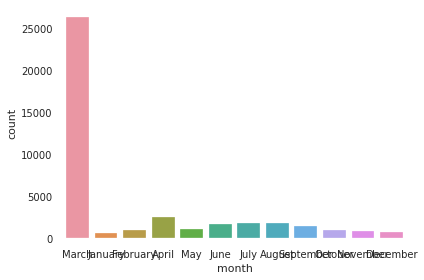

In [73]:
sns.countplot(data=data,x='month')
plt.tight_layout();

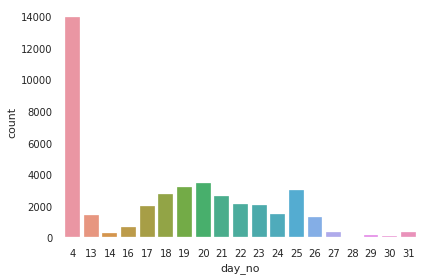

In [74]:
sns.countplot(data=data,x='day_no')
plt.tight_layout();

In [75]:
data[data['day_no']==4]['month'].value_counts()

August       1881
July         1843
June         1742
September    1471
May          1131
October      1005
February      954
November      909
March         810
December      803
April         767
January       630
Name: month, dtype: int64

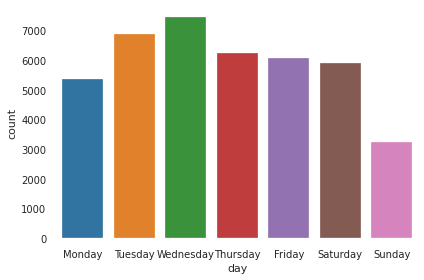

In [76]:
sns.countplot(data=data,x='day')
plt.tight_layout();

In [77]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'month', 'day_no', 'day'],
      dtype='object')

In [78]:
! pip install neattext

In [79]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [80]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [81]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'month', 'day_no', 'day'],
      dtype='object')

In [82]:
data['Sentiment'][41089]

'Neutral'

In [83]:
data['OriginalTweet'].iloc[41089]

"@dens_club @stasisnet With the Covid-19 pandemic affected many businesses &amp; resulting in the last month's BTC crashed, prices of many crypto assets declined rapidly is there any economic impact for Stasis?\r\r\n\r\r\n@prince876542 @SurajKu71255577 @YahairaP"

In [84]:
data['hadels']=data['OriginalTweet'].apply(nfx.extract_userhandles)

In [85]:
res = [ele for ele in data['hadels'].tolist() if ele!=[]]

In [86]:
flat_list = [item for sublist in res for item in sublist]


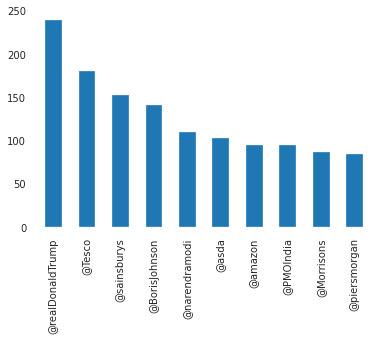

In [87]:
pd.Series(flat_list).value_counts()[0:10].plot(kind= 'bar');

In [88]:
data['hash_tags']=data['OriginalTweet'].apply(nfx.extract_hashtags)

In [89]:
res1 = [ele for ele in data['hash_tags'].tolist() if ele!=[]]
flat_list1 = [item for sublist in res1 for item in sublist]

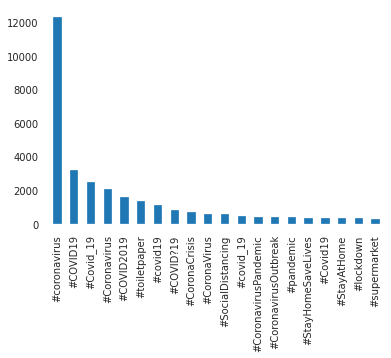

In [90]:
pd.Series(flat_list1).value_counts()[0:20].plot(kind= 'bar')

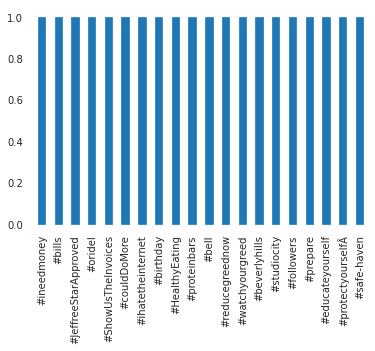

In [91]:
pd.Series(flat_list1).value_counts()[-20:].plot(kind= 'bar')

In [92]:
data.drop(['UserName', 'ScreenName', 'Location','TweetAt'],axis =1, inplace= True)

In [93]:
data.columns

Index(['OriginalTweet', 'Sentiment', 'month', 'day_no', 'day', 'hadels',
       'hash_tags'],
      dtype='object')